### Importing Libraries

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

#### Reading csv

_tel_churn.csv คือไฟล์ที่ treat missing value, ตัดคอลัมน์ที่ไม่ต้องการ, ทำ dummy แล้ว

In [ ]:
df=pd.read_csv("_tel_churn.csv")
df.head()

,Unnamed: 0,Monthly Charges,Total Charges,Churn Value,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,...,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,1,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,2,99.65,820.50,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
3,3,104.80,3046.05,1,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,4,103.70,5036.30,1,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
#ลบคอลัมน์ที่ไม่ใช้ออก
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
#ลบคอลัมน์ที่เป็นตัวแปร y
x=df.drop('Churn Value',axis=1)
x.head()

,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,53.85,108.15,0,1,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,70.70,151.65,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,99.65,820.50,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
3,104.80,3046.05,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,103.70,5036.30,0,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
#คอลัมน์ตัวแปร y
y=df['Churn Value']
y

0       1
1       1
2       1
3       1
4       1
       ..
7027    0
7028    0
7029    0
7030    0
7031    0
Name: Churn Value, Length: 7032, dtype: int64

ศึกษาความแตกต่างระหว่างการไม่ทำ resample และการทำ resample

##### Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100, shuffle=True)

In [ ]:
x_train.shape

(4922, 51)

#### Decision Tree Classifier

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=100)

In [ ]:
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
y_pred=clf_dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
clf_dt.score(x_test,y_test)

0.728909952606635

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1544
           1       0.49      0.52      0.51       566

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



###### As you can see that the accuracy is quite low (0.73), and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [ ]:
sm = SMOTE(random_state=100)
x_train_re, y_train_re = sm.fit_resample(x_train,y_train)

In [ ]:
x_train_re.shape

(7238, 51)

In [ ]:
clf_dt.fit(x_train_re,y_train_re)
y_predict = clf_dt.predict(x_test)
model_score_r = clf_dt.score(x_test, y_test)
print(model_score_r)
print(metrics.classification_report(y_test, y_predict))

0.7345971563981043
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1544
           1       0.51      0.51      0.51       566

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



precision is better (0.51)

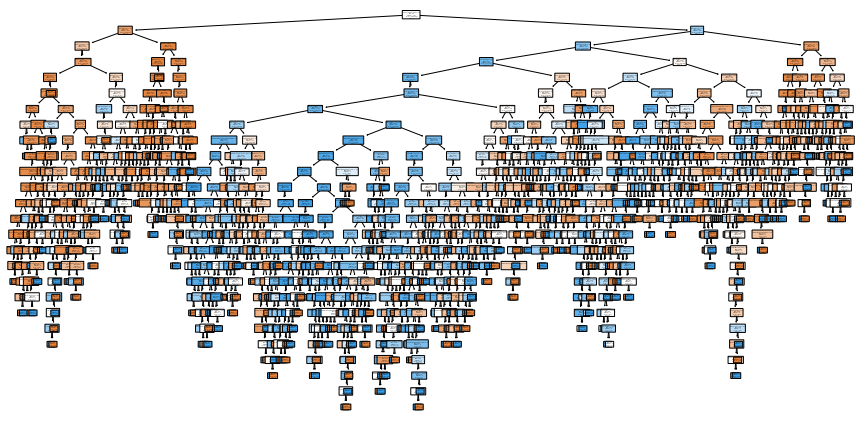

In [ ]:
## NOTE: We can plot the tree and it is huge!
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=['0','1'], 
          feature_names=x_train.columns); 

In [ ]:
#visualize tree map
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, export_graphviz
graph = Source(export_graphviz(clf_dt, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_train.columns ,class_names=['0','1']))

display(SVG(graph.pipe(format='svg')))

Cost Complexity Pruning Part 1: Visualize alpha

**Decision Trees** are notorious for being **overfit** to the **Training Dataset**, and there are a lot of parameters, like `max_depth` and `min_samples`, that are designed to reduce overfitting. However, pruning a tree with **cost complexity pruning** can simplify the whole process of finding a smaller tree that impoves the accuracy with the **Testing Dataset**.

Pruning a decision tree is all about finding the right value for the pruning parameter, `alpha`, which controls how little or how much pruning happens. One way to find the optimal value for `alpha` is to plot the accuracy of the tree as a function of different values.  We'll do this for both the **Training Dataset** and the **Validation Dataset**.

First, let's extract the different values of `alpha` that are available for this tree and build a pruned tree for each value for `alpha`. **NOTE:** We omit the maximum value for alpha with `ccp_alphas = ccp_alphas[:-1]` because it would prune all leaves, leaving us with only a root instead of a tree.

Create train, validation, and test set

In [ ]:
from sklearn.model_selection import train_test_split
X, X_val, Y, Y_val = train_test_split(x_train_re, y_train_re,test_size=0.3 ,random_state=100, shuffle=True)

In [ ]:
#check row
print('X_val',len(X_val))
print('X',len(X))

X_val 2172
X 5066


In [ ]:
path = clf_dt.cost_complexity_pruning_path(X, Y) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=100, ccp_alpha=ccp_alpha)
    clf_dt.fit(X, Y)
    clf_dts.append(clf_dt)

Now let's graph the accuracy of the trees using the Training Dataset and the Validation Dataset as a function of alpha.

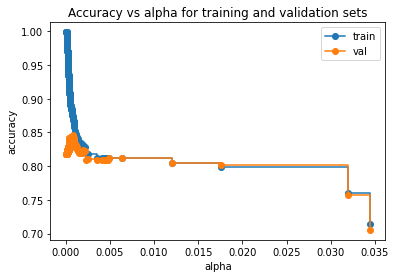

In [ ]:
import matplotlib.pyplot as plt

train_scores = [clf_dt.score(X, Y) for clf_dt in clf_dts]
val_scores = [clf_dt.score(X_val, Y_val) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="val", drawstyle="steps-post")
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the **Validation Set** hits its maximum value when `alpha` is about **0.001**. After this value for `alpha`, the accuracy of the **Training Dataset** drops off and that suggests we should set `ccp_alpha=0.001`.
Since there are many ways we could have divided the original dataset into **Training** and **Validation** datasets, how do we know we used the best **Training Dataset** and how do we know we used the best **Validation Dataset**? Typically, we answer this question with **10-Fold Cross Validation**. So that's what we're going to do now, and we'll do it with the `cross_val_score()` function.


Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha

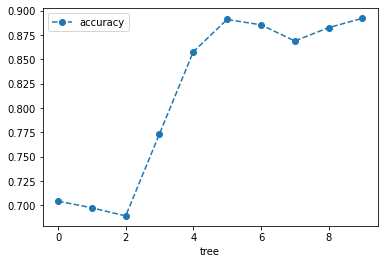

In [ ]:
from sklearn.model_selection import cross_val_score
clf_dt = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001) # create the tree with ccp_alpha=0.002

## now use 10-fold cross validation create 10 different training and testing datasets that
## are then used to train and test the tree.
scores = cross_val_score(clf_dt, x_train_re, y_train_re, cv=10) 
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different **Training** and **Validation** data with the same `alpha` resulted in different accuracies, suggesting that `alpha` is sensitive to the datasets. So, instead of picking a single **Training** dataset and single **Validation** dataset, let's use **cross validation** to find the optimal value for `ccp_alpha`.

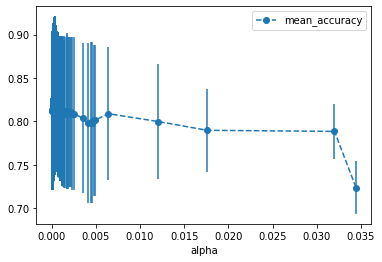

In [ ]:
import numpy as np
## create an array to store the results of each fold during cross validiation
alpha_loop_values = []

## For each candidate value for alpha, we will run 10-fold cross validation.
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values...
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=100, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, x_train_re, y_train_re, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

In [ ]:
alpha_results['mean_accuracy'].sort_values(ascending=False)

235    0.830914
204    0.830776
206    0.830776
205    0.830776
207    0.830776
         ...   
341    0.798724
339    0.798585
346    0.789870
347    0.788627
348    0.723951
Name: mean_accuracy, Length: 349, dtype: float64

In [ ]:
alpha_results.iloc[235]

alpha            0.000365
mean_accuracy    0.830914
std              0.087137
Name: 235, dtype: float64

best alpha = 0.000365

In [ ]:
ideal_ccp_alpha = 0.000365

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=100, 
                                       ccp_alpha=ideal_ccp_alpha)

In [ ]:
clf_dt_pruned.fit(x_train_re, y_train_re)
y_predict = clf_dt_pruned.predict(x_test)
model_score_r = clf_dt_pruned.score(x_test, y_test)
print(model_score_r)
print(metrics.classification_report(y_test, y_predict))

0.7668246445497631
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1544
           1       0.57      0.56      0.56       566

    accuracy                           0.77      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print('roc auc score is: ', roc_auc_score(y_test,y_predict))

roc auc score is:  0.7007840678152292


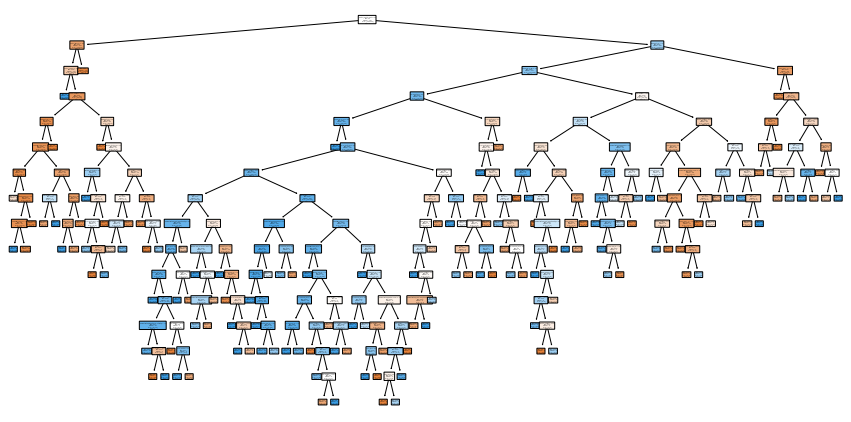

In [ ]:
## NOTE: We can plot the tree and it is smaller
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=['0','1'], 
          feature_names=x_train.columns); 

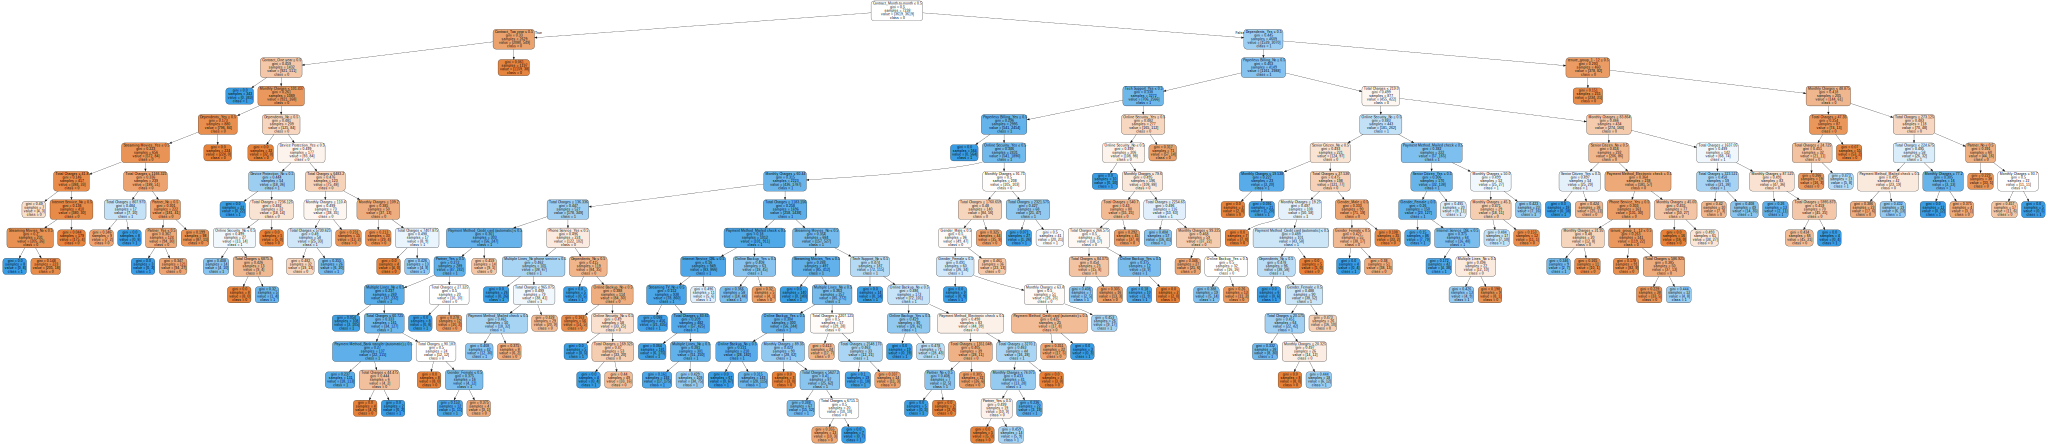

In [ ]:
#visualize tree map
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, export_graphviz
graph = Source(export_graphviz(clf_dt_pruned, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_train.columns ,class_names=['0','1']))

display(SVG(graph.pipe(format='svg')))

In [34]:
#pickling the model
import pickle
filename = 'model.sav'
pickle.dump(clf_dt_pruned,open(filename,'wb'))
load_model = pickle.load(open(filename,'rb'))